In [1]:
from u19_pipeline import acquisition, ephys
from u19_pipeline.ephys_element import ephys_element, probe_element
import datajoint as dj

Connecting shans@datajoint00.pni.princeton.edu:3306


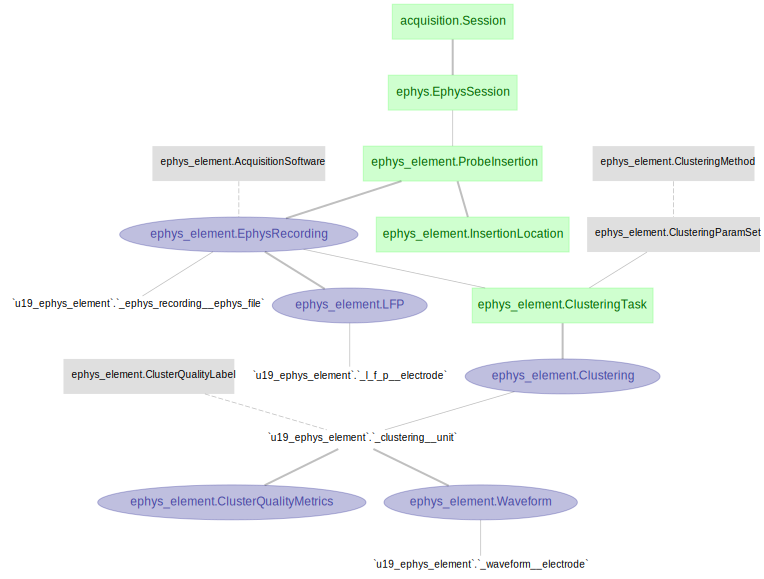

In [13]:
dj.Diagram(acquisition.Session) + ephys.EphysSession + dj.Diagram(ephys_element)

In [3]:
ephys_element.ProbeInsertion()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,probe unique identifier for this model of probe (e.g. part number)
hnieh_E105,2021-01-15,0,0,17131311651


In [11]:
display_progress = True
populate_settings = {'display_progress': display_progress, 'reserve_jobs': False, 'suppress_errors': False}

print('\n---- Populate ephys.EphysRecording ----')
ephys_element.EphysRecording.populate(**populate_settings)

In [20]:
ephys_element.EphysRecording() * probe_element.ElectrodeConfig.Electrode

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",acq_software,sampling_rate (Hz)
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,0,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,1,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,2,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,3,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,4,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,5,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,6,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,7,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,8,SpikeGLX,30000.6
hnieh_E105,2021-01-15,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,9,SpikeGLX,30000.6


In [21]:
print('\n---- Populate ephys.LFP ----')
ephys_element.LFP.populate(**populate_settings)

LFP:   0%|          | 0/1 [00:00<?, ?it/s]


---- Populate ephys.LFP ----


ValueError: output array is read-only

In [2]:
# insert clustering task manually
params_ks = {
    "fs": 30000,
    "fshigh": 150,
    "minfr_goodchannels": 0.1,
    "Th": [10, 4],
    "lam": 10,
    "AUCsplit": 0.9,
    "minFR": 0.02,
    "momentum": [20, 400],
    "sigmaMask": 30,
    "ThPr": 8,
    "spkTh": -6,
    "reorder": 1,
    "nskip": 25,
    "GPU": 1,
    "Nfilt": 1024,
    "nfilt_factor": 4,
    "ntbuff": 64,
    "whiteningRange": 32,
    "nSkipCov": 25,
    "scaleproc": 200,
    "nPCs": 3,
    "useRAM": 0
}
ephys_element.ClusteringParamSet.insert_new_params(
    'kilosort2', 0, 'Spike sorting using Kilosort2', params_ks)

In [3]:
ephys_element.ClusteringParamSet()

paramset_idx,clustering_method,paramset_desc,param_set_hash,params dictionary of all applicable parameters
0,kilosort2,Spike sorting using Kilosort2,83f93e90-d8e0-1dca-5b2c-f65e2b0b3c61,=BLOB=


In [15]:
ephys_element.EphysRecording.EphysFile()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,file_path filepath relative to root data directory
hnieh_E105,2021-01-15,0,0,2021_01_15_E105/towersTask_g0/towersTask_g0_imec0/towersTask_g0_t0.imec0.ap.meta


In [16]:
ephys_key = ephys_element.EphysRecording.fetch1('KEY')
ephys_dir = ephys.EphysSession.fetch1('ephys_directory') + '/towersTask_g0_imec0'


In [6]:
ephys_element.ClusteringTask()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,paramset_idx,clustering_output_dir clustering output directory relative to root data directory


In [17]:
ephys_element.ClusteringTask.insert1(
    dict(**ephys_key, paramset_idx=0, clustering_output_dir=ephys_dir))

In [18]:
ephys_element.ClusteringTask()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,paramset_idx,clustering_output_dir clustering output directory relative to root data directory
hnieh_E105,2021-01-15,0,0,0,/mnt/bucket/labs/tank/schottdorf/NPX/2021_01_15_E105/towersTask_g0/towersTask_g0_imec0


In [19]:
print('\n---- Populate ephys.Clustering ----')
ephys_element.Clustering.populate(**populate_settings)

Clustering:   0%|          | 0/1 [00:00<?, ?it/s]


---- Populate ephys.Clustering ----


Clustering: 100%|██████████| 1/1 [00:07<00:00,  7.62s/it]


In [20]:
ephys_element.Clustering.Unit()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",cluster_quality_label,spike_count how many spikes in this recording of this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
hnieh_E105,2021-01-15,0,0,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,0,mua,1227,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,1,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,0,mua,9390,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,2,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,2,mua,34,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,3,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,4,mua,4393,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,4,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,5,mua,5535,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,5,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,6,mua,20133,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,6,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,6,good,8519,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,7,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,8,good,10475,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,8,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,9,mua,212,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,9,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,11,good,30,=BLOB=,=BLOB=,=BLOB=


In [21]:
print('\n---- Populate ephys.Waveform ----')
ephys_element.Waveform.populate(**populate_settings)

Waveform:   0%|          | 0/1 [00:00<?, ?it/s]


---- Populate ephys.Waveform ----


Waveform:   0%|          | 0/1 [00:00<?, ?it/s]


ValueError: output array is read-only

In [23]:
ephys_element.Clustering.Unit()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",cluster_quality_label,spike_count how many spikes in this recording of this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
hnieh_E105,2021-01-15,0,0,0,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,0,mua,1227,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,1,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,0,mua,9390,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,2,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,2,mua,34,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,3,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,4,mua,4393,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,4,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,5,mua,5535,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,5,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,6,mua,20133,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,6,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,6,good,8519,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,7,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,8,good,10475,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,8,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,9,mua,212,=BLOB=,=BLOB=,=BLOB=
hnieh_E105,2021-01-15,0,0,0,9,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,neuropixels 1.0 - 3B,11,good,30,=BLOB=,=BLOB=,=BLOB=


TODO: 
    - Sync table under ephys module.
    - Unit table could contain the clustering results for multiple sorters. U19 team needs to implemnt the workflow for other sorters by overwriting the make function of the table `ephys_element.Clustering`. e.g.
    ```
    def ironclust_make(key):
    if (ephys_element.ClusteringMethod & key).fetch1('clustering_method') != 'ironclust':
        return
    pass
    ephys_element.Clustering.make = ironclust_make
    ephys_element.Clustering.populate()
    ```
    - DJ team will fix the 'output array is read-only' bug